  # **                                  Property Price Prediction                   **
                   

## Problem Statement

A key challenge for property sellers is to determine the sale price of the property. The ability to predict the exact property value is beneficial for property investors as well as for buyers to plan their finances according to the price trend. The property prices depend on the number of features like the property area, basement square footage, year built, number of bedrooms, and so on. Regression analysis can be useful in predicting the price of the house.

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Load the Data](#Load_Data)**
3. **[Read Data](#Read_Data)**
4. **[Prepare and Analyze the Data](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Type](#Data_Types)
        - 4.1.2 - [Summary Statistics](#Summary_Statistics)
        - 4.1.3 - [Distribution of Variables](#distribution_variables)
        - 4.1.4 - [Discover Outliers](#outlier)
        - 4.1.5 - [Missing Values](#Missing_Values)
        - 4.1.6 - [Correlation](#correlation)
        - 4.1.7 - [Analyze Relationships Between Target and Categorical Variables](#cat_num)
    - 4.2 - [Data Preparation](#Data_Preparation)
        - 4.2.1 - [Check for Normality](#Normality)
        - 4.2.2 - [Dummy Encode the Categorical Variables](#dummy)
5. **[Linear Regression (OLS)](#LinearRegression)**
    - 5.1 - [Multiple Linear Regression Full Model with Log Transformed Dependent Variable (OLS)](#withLog)
    - 5.2 - [Multiple Linear Regression Full Model without Log Transformed Dependent Variable (OLS)](#withoutLog)
    - 5.3 - [Feature Engineering](#Feature_Engineering)
      - 5.3.1 - [Multiple Linear Regression (Using New Feature) - 1](#feature1)
      - 5.3.2 - [Multiple Linear Regression (Using New Feature) - 2](#feature2)
6. **[Feature Selection](#feature_selection)**
     - 6.1 - [Variance Inflation Factor](#vif)

7. **[Conclusion and Interpretation](#conclusion)**

<a id='import_lib'></a>
# 1. Import Libraries


  Import the required libraries 
                

In [4]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing


from scipy.stats import shapiro
from scipy import stats




In [5]:
# suppress  warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# set the plot size using 'rcParams'
plt.rcParams['figure.figsize'] = [15,8]

<a id='Load_Data'></a>
# 2.Load Data

In [150]:
# Loading the dataset 
df_property = pd.read_csv("E:/whatsapp Material/Github Projects/Property price prediction using Regression analysis/HousePrices.csv")
df_property

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


<a id='Read_Data'></a>
# 3. Reading the Data

In [151]:
#  top 5 rows of the dataframe
df_property.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Dimensions of the data

In [7]:
# Looking number of rows and columns
df_property.shape

(2073, 81)

In [8]:
# Here we see detailed information of the dataset
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [9]:
df_property.Zone_Class.value_counts()

RL         1611
RM          324
FV          102
RH           22
C (all)      14
Name: Zone_Class, dtype: int64

In [10]:
df_property.Alley.value_counts()

Grvl    72
Pave    57
Name: Alley, dtype: int64

In [11]:
df_property[df_property.Dwell_Type > 300]

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
1538,1539,303,RM,120.0,9596,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,256300
1751,1752,7080,RL,65.0,9549,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,190000


In [12]:
# Treating Missing values

miss_values = df_property.isnull().sum()
print("Number of missing value columns are {}".format(len(miss_values[miss_values > 0])))
miss_values[miss_values > 0].sort_values(ascending=False)

Number of missing value columns are 19


PoolQC          2065
MiscFeature     1993
Alley           1944
Fence           1669
FireplaceQu      988
LotFrontage      320
GarageType       113
GarageYrBlt      113
GarageFinish     113
GarageQual       113
GarageCond       113
BsmtExposure      61
BsmtFinType2      60
BsmtFinType1      59
BsmtCond          59
BsmtQual          59
MasVnrArea        14
MasVnrType        14
Electrical         1
dtype: int64

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

<a id='Data_Types'></a>
### 4.1.1 Data Type


                 Check for the data type

In [13]:
#  Using 'dtypes' 
df_property.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
                        ...   
MoSold                   int64
YrSold                   int64
SaleType                object
SaleCondition           object
Property_Sale_Price      int64
Length: 81, dtype: object

In [14]:
df_property.head(3)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500




'Dwell_Type ', 'OverallQual' and 'OverallCond' are categorical variables, so we will convert these variables data type to 'object'

In [15]:
df_property['Dwell_Type'] = df_property['Dwell_Type'].astype('O')
df_property['OverallQual'] = df_property['OverallQual'].astype('O')
df_property['OverallCond'] = df_property['OverallCond'].astype('O')

#### i will  remove the Id column as it is  not  necessary for our analysis

In [16]:
df_property.drop(['Id'], axis=1, inplace=True)

In [17]:
df_property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 80 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Dwell_Type           2073 non-null   object 
 1   Zone_Class           2073 non-null   object 
 2   LotFrontage          1753 non-null   float64
 3   LotArea              2073 non-null   int64  
 4   Road_Type            2073 non-null   object 
 5   Alley                129 non-null    object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

In [18]:
df_property.head(3)

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics



In [19]:
df_property.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1753.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,...,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,72.056475,10717.853353,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,...,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,27.987475,9215.982306,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,...,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7620.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,70.000000,9492.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,83.000000,11601.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,...,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**2. For getting the statistical summary of categorical features we use the describe(include = object)**

In [20]:
# summary of categorical variables
df_property.describe(include = object)

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,2073,129,2073,2073,2073,2073,2073,2073,...,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,18,5,2,2,4,4,2,5,3,25,...,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,722,1611,2063,72,1300,1854,2070,1481,1958,317,...,1252,857,1870,1885,1913,4,233,74,1797,1695


 we will remove the variables `PoolQC` and `PoolArea`.

In [21]:
df_property.PoolQC.isnull().sum()

2065

In [22]:
# Now drop the column
df_property = df_property.drop(['PoolQC', 'PoolArea'], axis= 1)

# re-check the shape of the dataframe
df_property.shape

(2073, 78)

<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

**1. Distribution of numeric variables**

We plot the histogram to check the distribution of the variables.

In [23]:

df_numeric_features = df_property.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [24]:
df_numeric_features.shape

(2073, 33)

In [25]:
plt.rcParams["figure.figsize"] = [20,15]

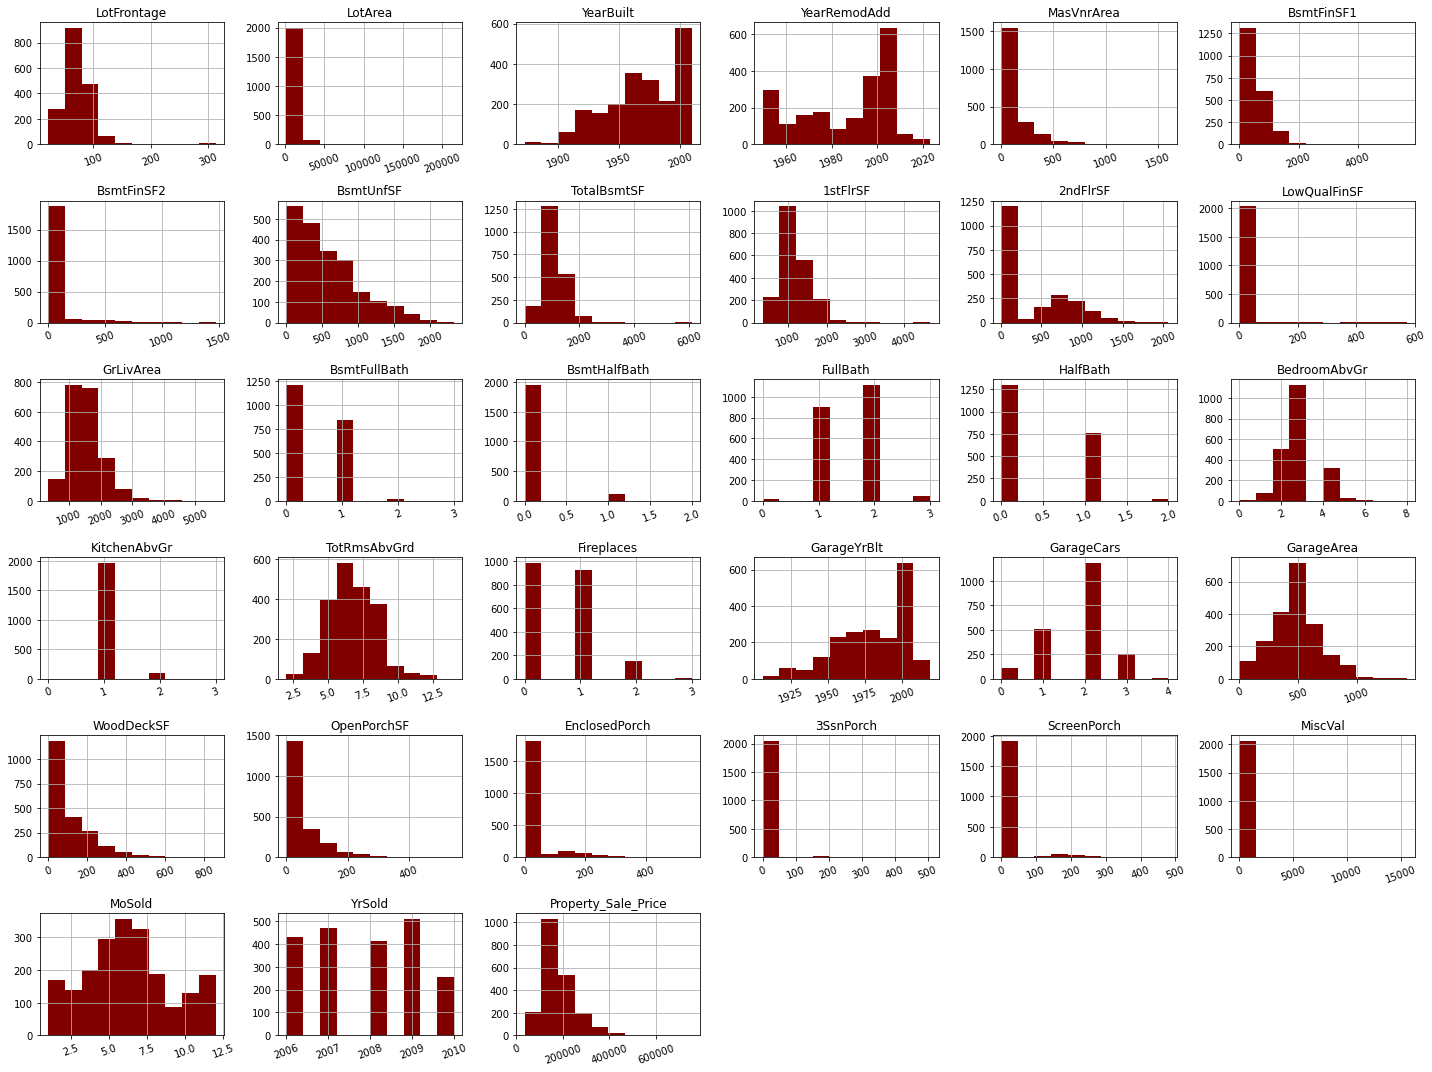

In [26]:
# plot the histogram of numeric variables


df_numeric_features.hist(xrot = 20, color = "maroon")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  


#### Visualize the target variable

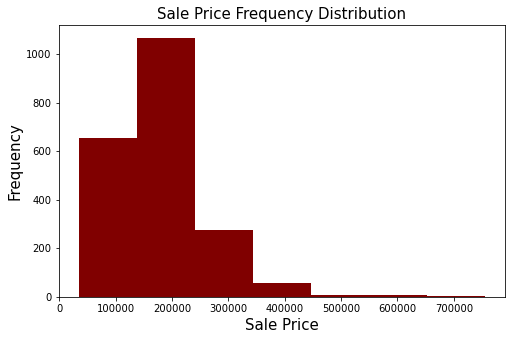

In [27]:
# Sale Price Frequency Distribution

plt.figure(figsize=(8,5))
plt.xlabel("Sale Price", fontsize=15)


plt.ylabel("Frequency", fontsize=15)


plt.title("Sale Price Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df_property["Property_Sale_Price"], color = 'maroon',bins=7)
plt.show()

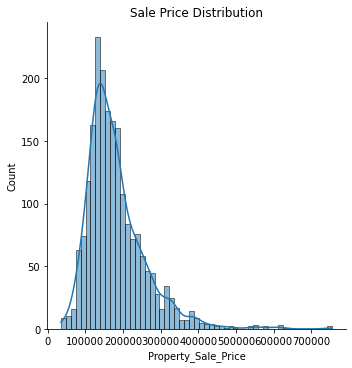

In [28]:
import seaborn as sns
sns.displot(df_property["Property_Sale_Price"],kde=True)
plt.title('Sale Price Distribution')
plt.show()

 The above plot shows that the target variable 'Property_Sale_Price' is right skewed. 
                    


**2. Distribution of categorical variables**

For the categoric variables, we plot the countplot

In [29]:
cat_vars = df_property.dtypes[df_property.dtypes == 'object'].index

cat_vars = [ x for x in cat_vars]
cat_vars

['Dwell_Type',
 'Zone_Class',
 'Road_Type',
 'Alley',
 'Property_Shape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'Dwelling_Type',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [30]:
df_cat_features = df_property.select_dtypes(include='object')

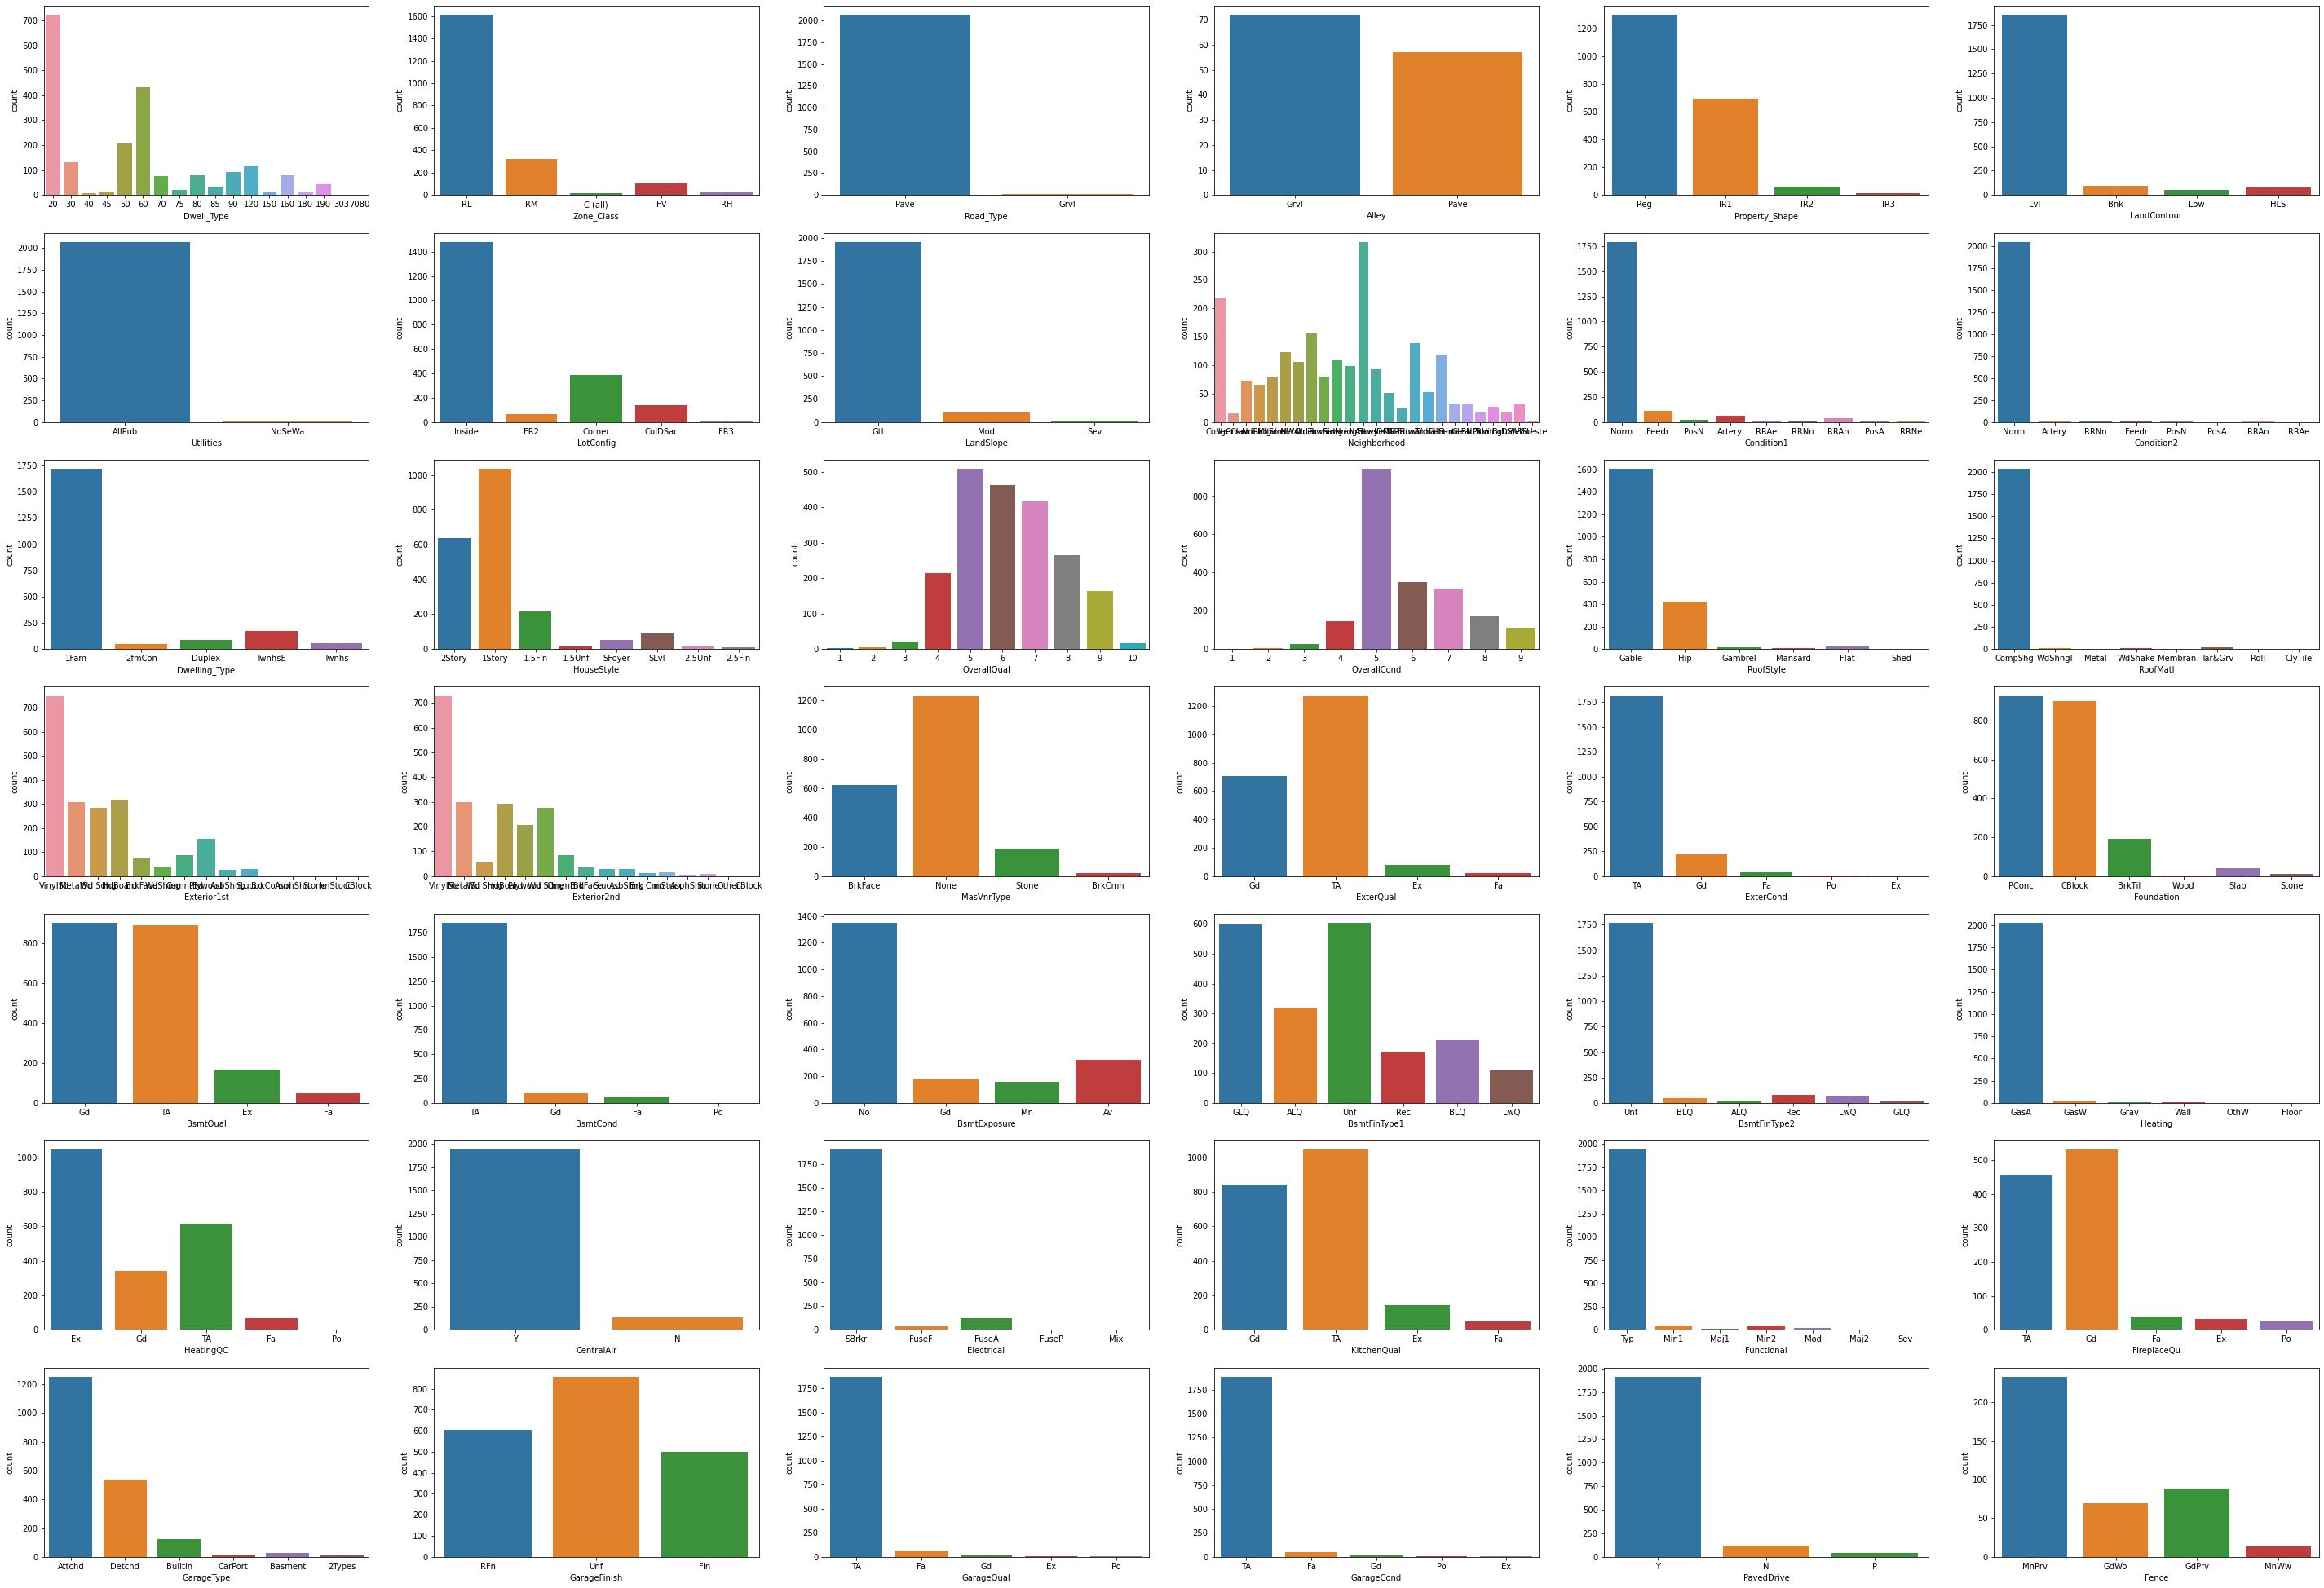

In [31]:
## Importing the library to check the data type.
from pandas.api.types import is_string_dtype

# create an empty list to store all the categorical variables
categorical=[]

# check the data type of each variable
for column in df_property:

    # check if the variable has the categorical type 
    if is_string_dtype(df_property[column]):
        
     
        categorical.append(column)


fig, ax = plt.subplots(nrows=7, ncols=6, figsize = (50, 35))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(cat_vars, ax.flatten()):
    sns.countplot(x=df_property[variable], ax = subplot)
    

plt.show()

#### Boxplot of OverallQuality and Property_Sale_Price

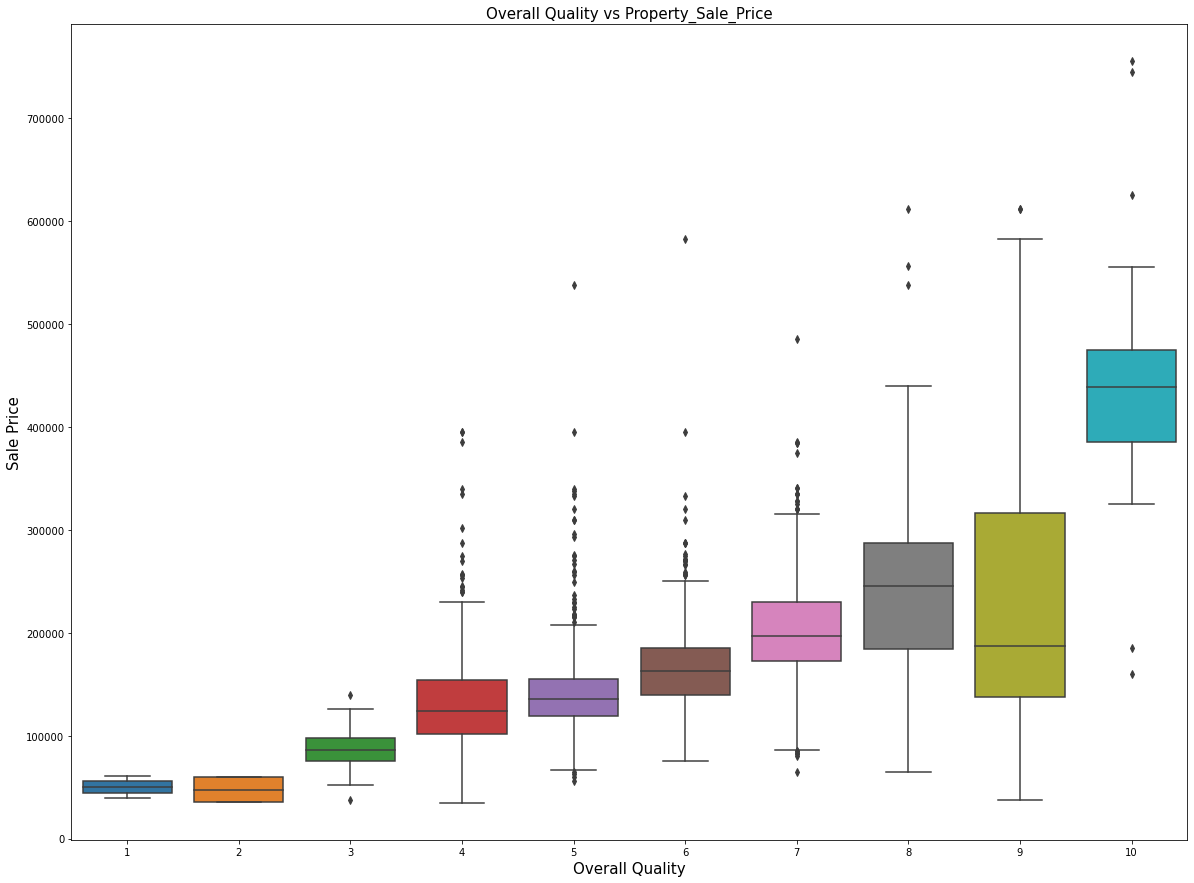

In [32]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Property_Sale_Price", x="OverallQual", data= df_property)


plt.title("Overall Quality vs Property_Sale_Price", fontsize=15)


plt.xlabel("Overall Quality", fontsize=15)


plt.ylabel("Sale Price", fontsize=15)


plt.show()

#### Boxplot of Overall Condition and Property_Sale_Price

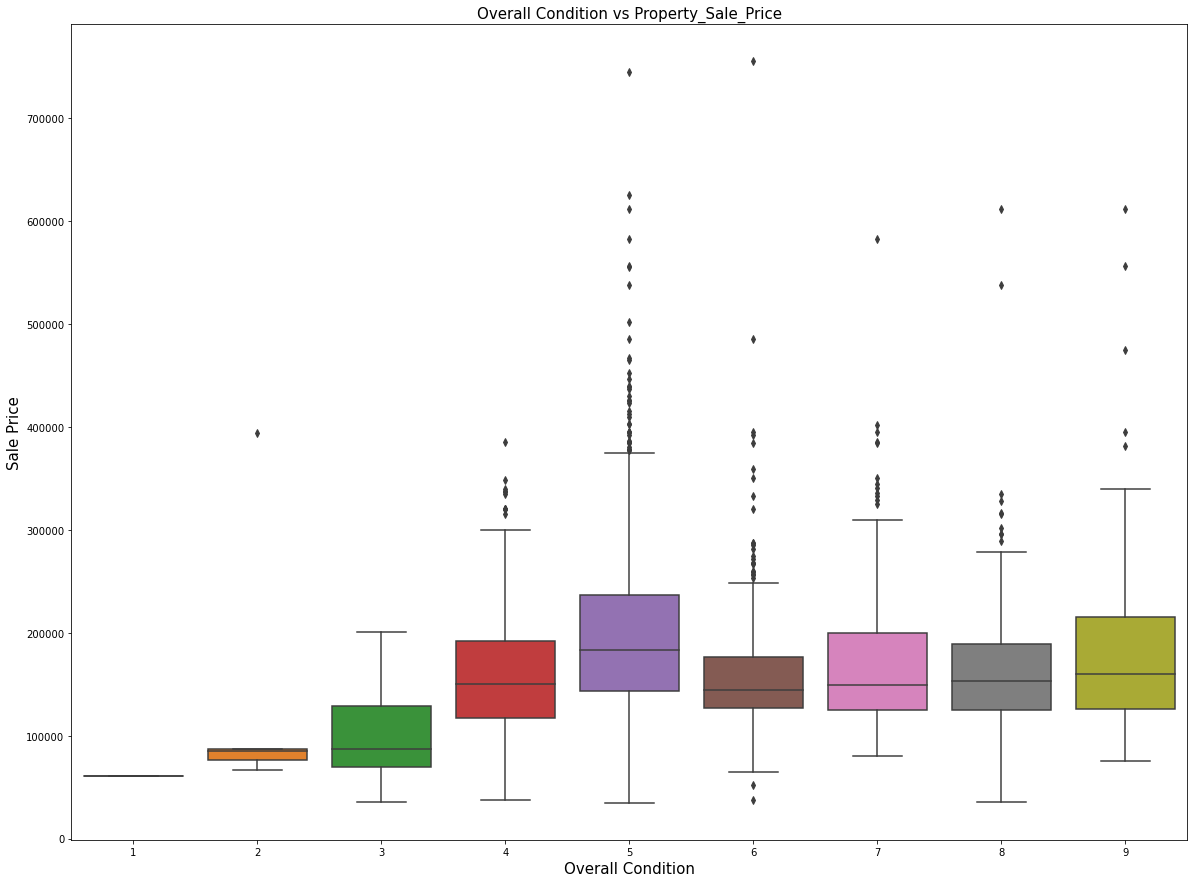

In [33]:
# draw the boxplot for OverallQuality and the Property_Sale_Price
sns.boxplot(y="Property_Sale_Price", x="OverallCond", data= df_property)


plt.title("Overall Condition vs Property_Sale_Price", fontsize=15)


plt.xlabel("Overall Condition", fontsize=15)


plt.ylabel("Sale Price", fontsize=15)


plt.show()

#### Draw the pairplot of the numeric variables

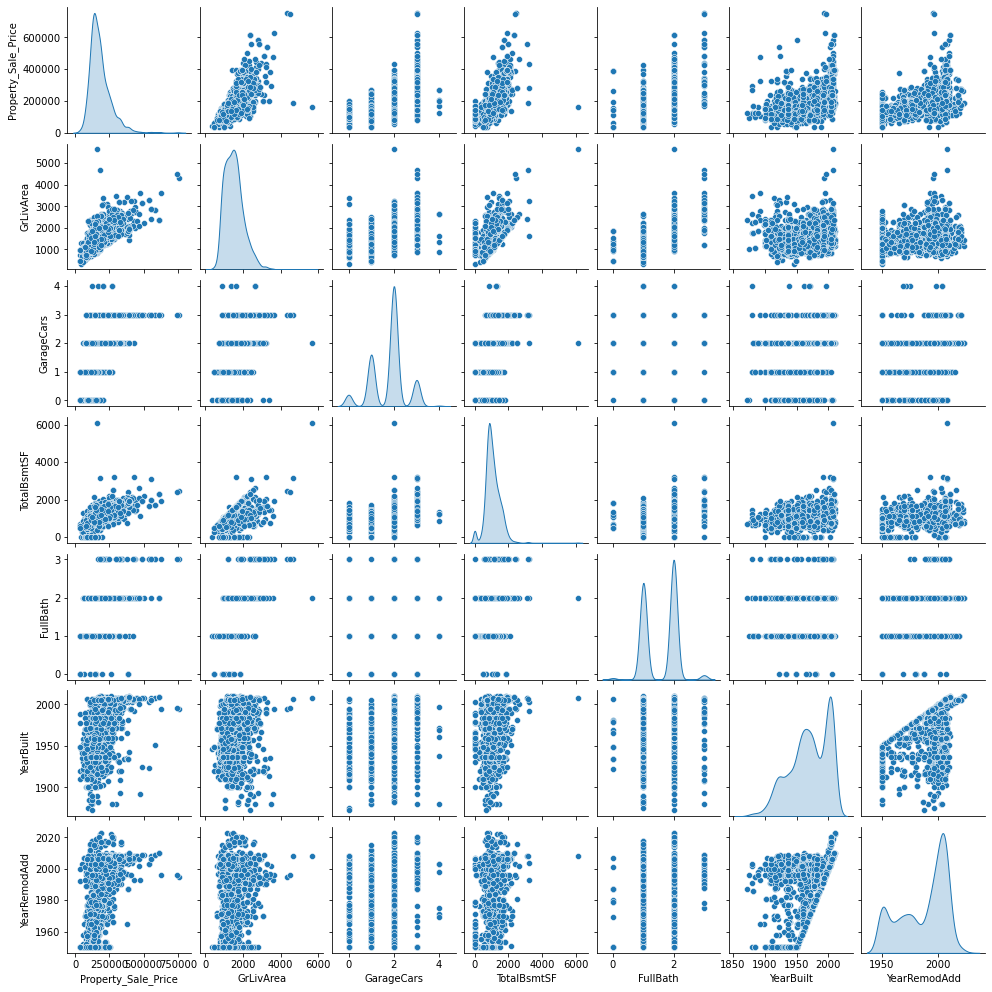

In [34]:
# Pairplot of numeric variables

# select the columns for the pairplot
columns= ["Property_Sale_Price", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd"]


sns.pairplot(df_property[columns], size=2, kind= "scatter", diag_kind="kde")


plt.show()

<a id='outlier'></a>
### 4.1.4 Outliers Discovery

In [35]:
# Finding outliers using formulae

IQR = df_property.Property_Sale_Price.quantile(.75) - df_property.Property_Sale_Price.quantile(.25)
LL = df_property.Property_Sale_Price.quantile(.25) - 1.5 * IQR
UL = df_property.Property_Sale_Price.quantile(.75) + 1.5 * IQR
print(IQR, LL, UL)

84000.0 4000.0 340000.0


In [36]:
sum(df_property.Property_Sale_Price >= 500000)

14

In [37]:
df_property.shape

(2073, 78)

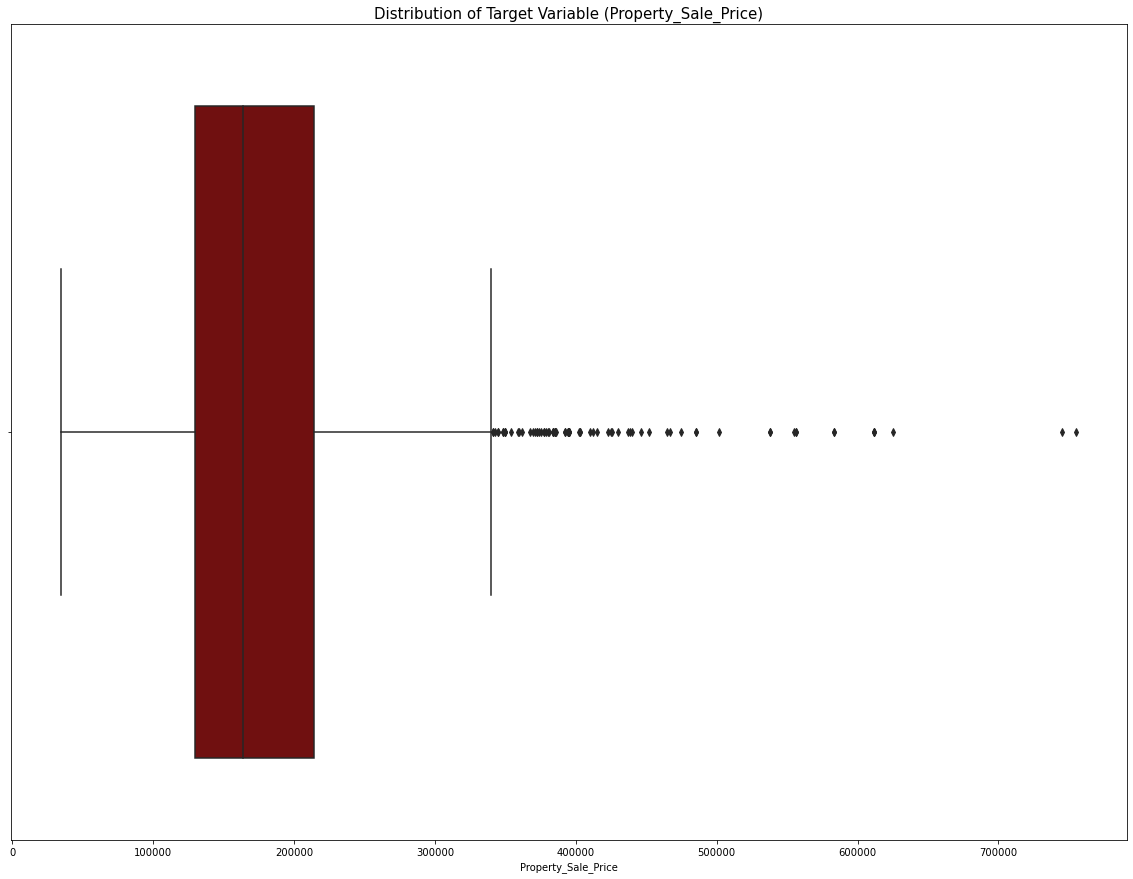

In [38]:
# plot a boxplot of target variable to detect the outliers
sns.boxplot(df_property['Property_Sale_Price'], color='maroon')


plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)


plt.show()

From the above plot we can see that there are outliers present in the target variable 'Property_Sale_Price'. Outliers badly affect the prediction of the regression model and thus, we will remove these outliers.

In [39]:
# remove the observations with the house price greater than or equal to 500000
df_property = df_property[df_property['Property_Sale_Price'] < 500000]

# check the dimension of the data
df_property.shape

(2059, 78)

<a id='Missing_Values'></a>
### 4.1.5 Missing Values



<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Look for the missing values and handle the missing values separately for numerical and categorical values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Look for the missing values**

In [40]:

total_nulls = df_property.isnull().sum().sort_values(ascending = False)          


percent_null = (df_property.isnull().sum()*100/df_property.isnull().count())  
percent_null = percent_null.sort_values(ascending = False) 

# concat the 'total_nulls' and 'percent_null' columns

missing_values = pd.concat([total_nulls, percent_null], axis = 1, keys = ['Total Nulls', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_values['Data Type'] = df_property[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
LotFrontage,320,15.541525,float64
...,...,...,...
TotalBsmtSF,0,0.000000,int64
Heating,0,0.000000,object
Zone_Class,0,0.000000,object
CentralAir,0,0.000000,object


We can see that 18 variables contain the missing values.</b>
              

**Handle the missing values for numerical variables**

In [41]:
# filter out the categorical variables and consider only the numeric variables with missing values
num_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] != 'object')]
num_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
LotFrontage,320,15.541525,float64
GarageYrBlt,113,5.488101,float64
MasVnrArea,14,0.679942,float64


#### The variable 'LotFrontage' is right skewed and thus we will fill the missing values with its median value

In [42]:
# use the function fillna() to fill the missing values
df_property['LotFrontage'] = df_property['LotFrontage'].fillna(df_property['LotFrontage'].median())

In [43]:
print(df_property.LotFrontage.mean())
print(df_property.LotFrontage.median())

71.58183584264206
70.0


#### We will replace the missing values in the numeric variable `GarageYrBlt` by 0. The missing values in this variable indicates that there are 81 observations for which garage facility is not available.

In [44]:
# use the function fillna() to replace missing values in 'GarageYrBlt' with 0 
df_property['GarageYrBlt'] = df_property['GarageYrBlt'].fillna(0)

#### The variable 'MasVnrArea' is positively skewed and thus we will fill the missing values with its median value

In [45]:
print(df_property.MasVnrArea.mean())
print(df_property.MasVnrArea.median())

98.54083129584352
0.0


In [46]:
df_property.shape[0]

2059

In [47]:
df_property.shape[0] - sum(df_property.MasVnrArea > 0.0)


1242

In [48]:
df_property.groupby(['Dwell_Type'])['MasVnrArea'].median()

Dwell_Type
20        0.0
30        0.0
40        0.0
45        0.0
50        0.0
60       75.5
70        0.0
75        0.0
80       43.5
85        0.0
90        0.0
120      66.0
150      28.0
160      42.0
180       0.0
190       0.0
303     640.0
7080      0.0
Name: MasVnrArea, dtype: float64

In [49]:
df_property.loc[df_property.Dwell_Type == 60, 'MasVnrArea'].count()

418

In [50]:
df_property.loc[df_property.Dwell_Type == 120, 'MasVnrArea'] = df_property.loc[df_property.Dwell_Type == 120, 'MasVnrArea'].fillna(df_property.loc[df_property.Dwell_Type == 120,'MasVnrArea'].median())

In [51]:
df_property['MasVnrArea'] = df_property['MasVnrArea'].fillna(df_property['MasVnrArea'].median())

In [52]:
df1 = df_property[df_property['MasVnrArea'].isnull()]

In [53]:
df1

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price


In [54]:
df1.groupby('Dwell_Type').count()

,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
Dwell_Type,,,,,,,,,,,,,,,,,,,,,


**Handle the missing values for categorical variables**

In [55]:
# filter out the numerical variables and consider only the categorical variables with missing values
cat_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] == 'object')]
cat_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
BsmtExposure,61,2.962603,object
BsmtFinType2,60,2.914036,object


In [56]:

# replace NA values in 'MiscFeature' with a valid value, 'None'
df_property['MiscFeature'] = df_property['MiscFeature'].fillna('None')


df_property['Alley'] = df_property['Alley'].fillna('No alley access')


df_property['Fence'] = df_property['Fence'].fillna('No Fence')

 
df_property['FireplaceQu'] = df_property['FireplaceQu'].fillna('No Fireplace')

In [57]:
# replace the missing values in the categoric variables representing the garage by `No Garage`
for col in ['GarageType', 'GarageFinish', 'GarageCond', 'GarageQual']:
    df_property[col].fillna('No Garage', inplace = True)

In [58]:
# replace the missing values in the categoric variables representing the basement by `No Basement`
for col in ['BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond','BsmtFinType1']:
    df_property[col].fillna('No Basement', inplace = True)

In [59]:
# replace the missing values in the categorical variable 'MasVnrType' with a value, 'None'
df_property['MasVnrType'] = df_property['MasVnrType'].fillna('None')

In [60]:
mode_electrical = df_property['Electrical'].mode()
mode_electrical

0    SBrkr
Name: Electrical, dtype: object

In [61]:
# replace the missing values in the categorical variable 'Electrical' with its mode
mode_electrical = df_property['Electrical'].mode()
df_property['Electrical'].fillna(mode_electrical[0] , inplace = True)

<a id='correlation'></a>
### 4.1.6 Study correlation

To check the correlation between numerical variables, compute a correlation matrix and we will plot a heatmap for the correlation matrix
                  

In [62]:
# use the corr() function to generate the correlation matrix of the numeric variables
corrmat = df_property.corr()

# print the correlation matrix
corrmat

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
LotFrontage,1.000000,0.238191,0.081517,0.092211,0.110638,0.118122,0.055937,0.105129,0.256237,0.318458,...,0.248652,0.073232,0.092217,0.000492,0.037425,0.018689,-0.003469,0.028949,0.024222,0.259284
LotArea,0.238191,1.000000,-0.017109,0.013312,0.042090,0.157255,0.077684,-0.000161,0.193753,0.239459,...,0.137110,0.112262,0.063370,-0.021205,0.011367,0.027271,0.031767,0.000059,-0.008380,0.201837
YearBuilt,0.081517,-0.017109,1.000000,0.534846,0.258698,0.200397,-0.027750,0.117984,0.322489,0.225896,...,0.404166,0.182813,0.178019,-0.321816,0.034844,-0.050894,-0.038275,0.031601,-0.007701,0.456523
YearRemodAdd,0.092211,0.013312,0.534846,1.000000,0.154359,0.092169,-0.074160,0.197311,0.275945,0.214706,...,0.329864,0.182945,0.218917,-0.176180,0.040749,-0.044323,-0.011217,0.038320,0.055504,0.497005
MasVnrArea,0.110638,0.042090,0.258698,0.154359,1.000000,0.204352,-0.077357,0.127904,0.317633,0.290105,...,0.342735,0.113125,0.136670,-0.094386,0.033541,0.054661,-0.034708,-0.005260,0.010887,0.439108
BsmtFinSF1,0.118122,0.157255,0.200397,0.092169,0.204352,1.000000,-0.063139,-0.514643,0.468375,0.377574,...,0.244935,0.208102,0.108858,-0.086769,0.047758,0.042606,-0.000288,-0.011921,0.019093,0.342365
BsmtFinSF2,0.055937,0.077684,-0.027750,-0.074160,-0.077357,-0.063139,1.000000,-0.207872,0.106746,0.095781,...,-0.019151,0.076978,-0.001180,0.058115,-0.030464,0.098692,-0.002251,-0.016672,0.025224,-0.028908
BsmtUnfSF,0.105129,-0.000161,0.117984,0.197311,0.127904,-0.514643,-0.207872,1.000000,0.444357,0.329430,...,0.197519,-0.005751,0.141691,-0.010603,0.009747,-0.013646,-0.019743,0.044928,-0.048135,0.243283
TotalBsmtSF,0.256237,0.193753,0.322489,0.275945,0.317633,0.468375,0.106746,0.444357,1.000000,0.779426,...,0.456518,0.240381,0.262956,-0.078579,0.047997,0.068569,-0.022127,0.028723,-0.021312,0.602471
1stFlrSF,0.318458,0.239459,0.225896,0.214706,0.290105,0.377574,0.095781,0.329430,0.779426,1.000000,...,0.462783,0.240294,0.216539,-0.049631,0.064372,0.074862,-0.027565,0.048724,-0.003292,0.581605


**2. Plot the heatmap for the diagonal correlation matrix**

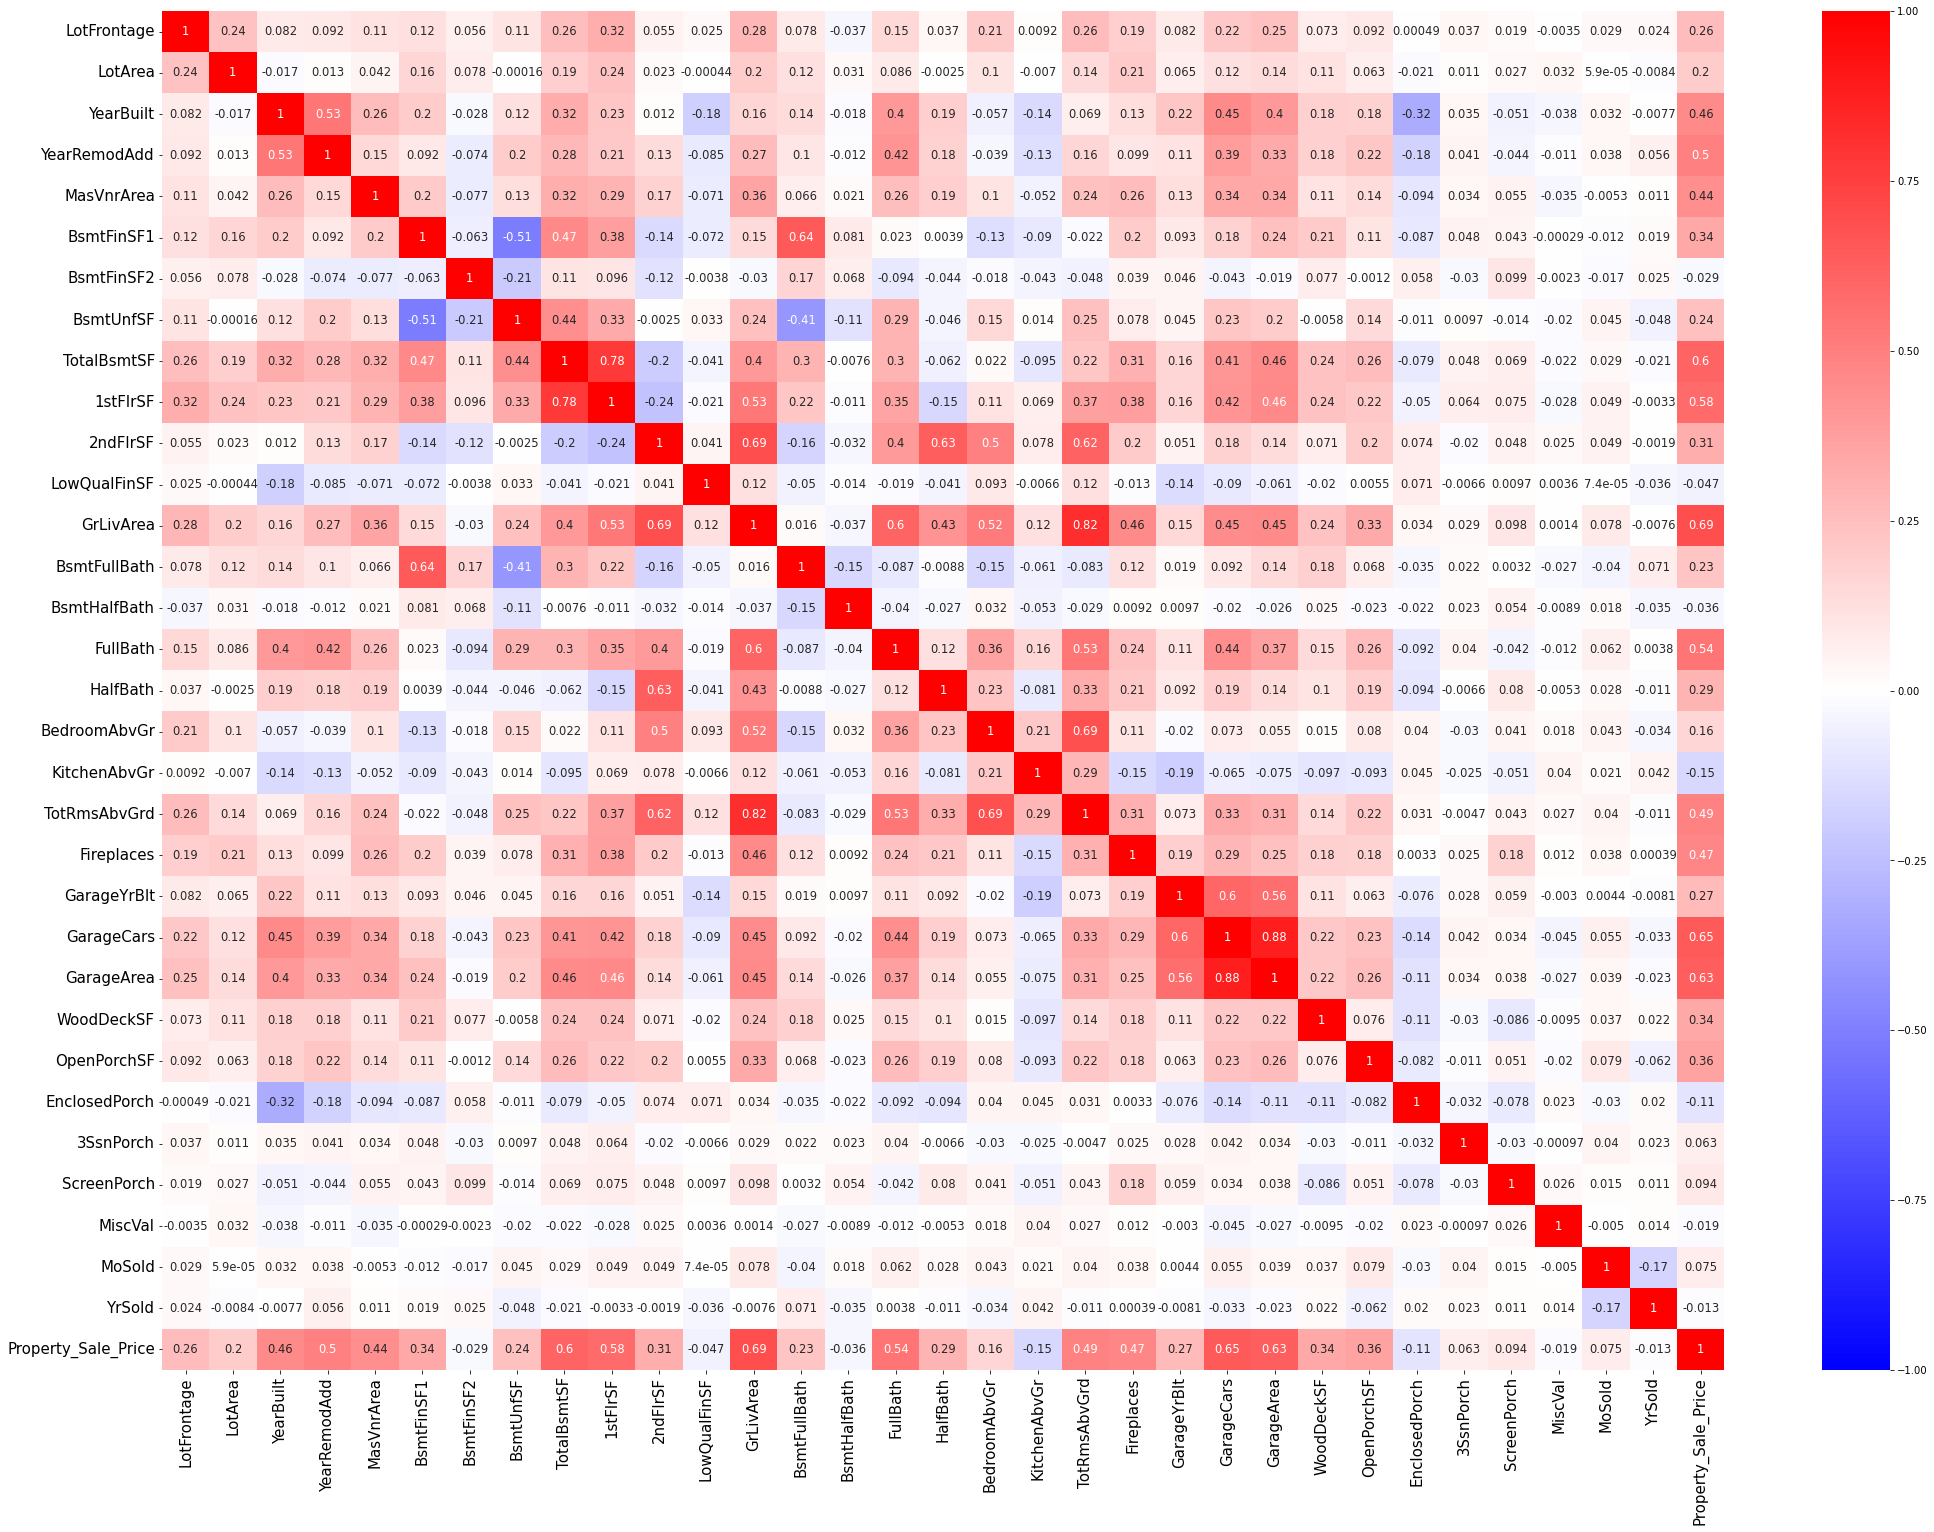

In [63]:
# set the plot size
plt.figure(figsize = (35,25))

# plot the heat map

sns.heatmap(corrmat, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})

# set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


plt.show()

From the above plot we can see that the highest positive correlation (= 0.88) is between the variables 'GarageArea' and 'GarageCars'.


<a id='cat_num'></a>
### 4.1.7 Analyze Relationships Between Target and Categorical Variables

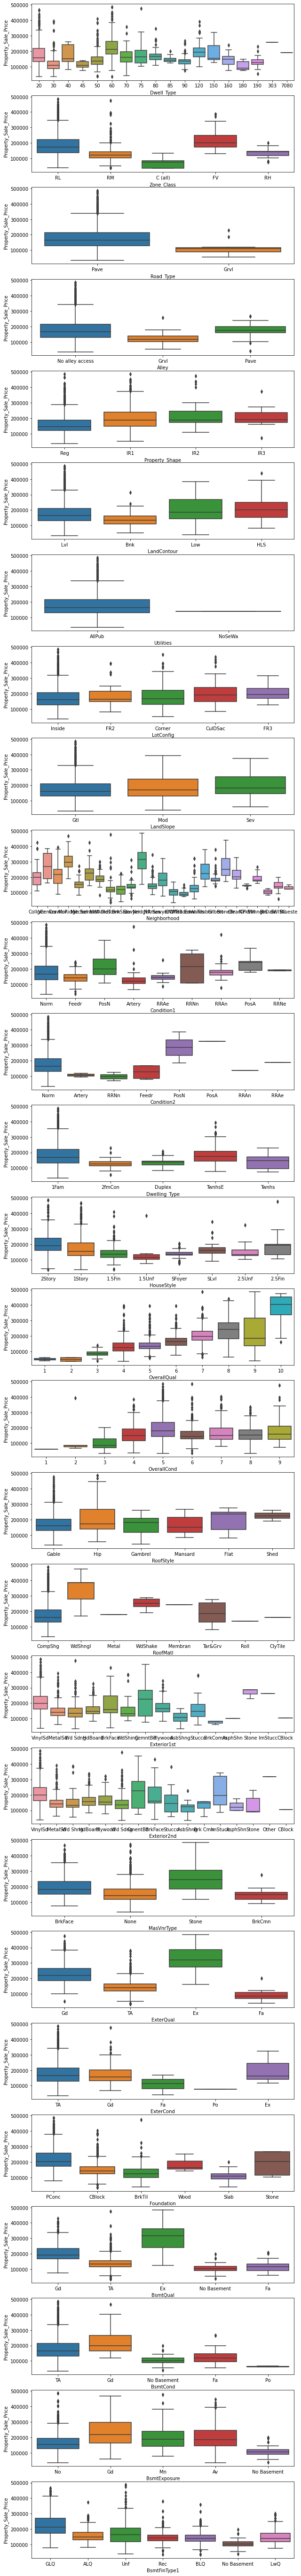

In [64]:
# create an empty list to store all the categorical variables
categorical=[]

# check the data type of each variable
for column in df_property:

    # check if the variable has the categorical type 
    if is_string_dtype(df_property[column]):
        
        # append the categorical variables to the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 28, ncols = 1, figsize = (10, 100))

# plot the boxplot for each categoric and target variable
for variable, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = variable, y = 'Property_Sale_Price', data = df_property, ax = subplot)
    
# display the plot
plt.show()

<a id='Data_Preparation'></a>
## 4.2 Data Preparation

<a id='Normality'></a>
### 4.2.1 Check for Normality

**Plot a histogram and also perform the Shapiro-Wilk test**

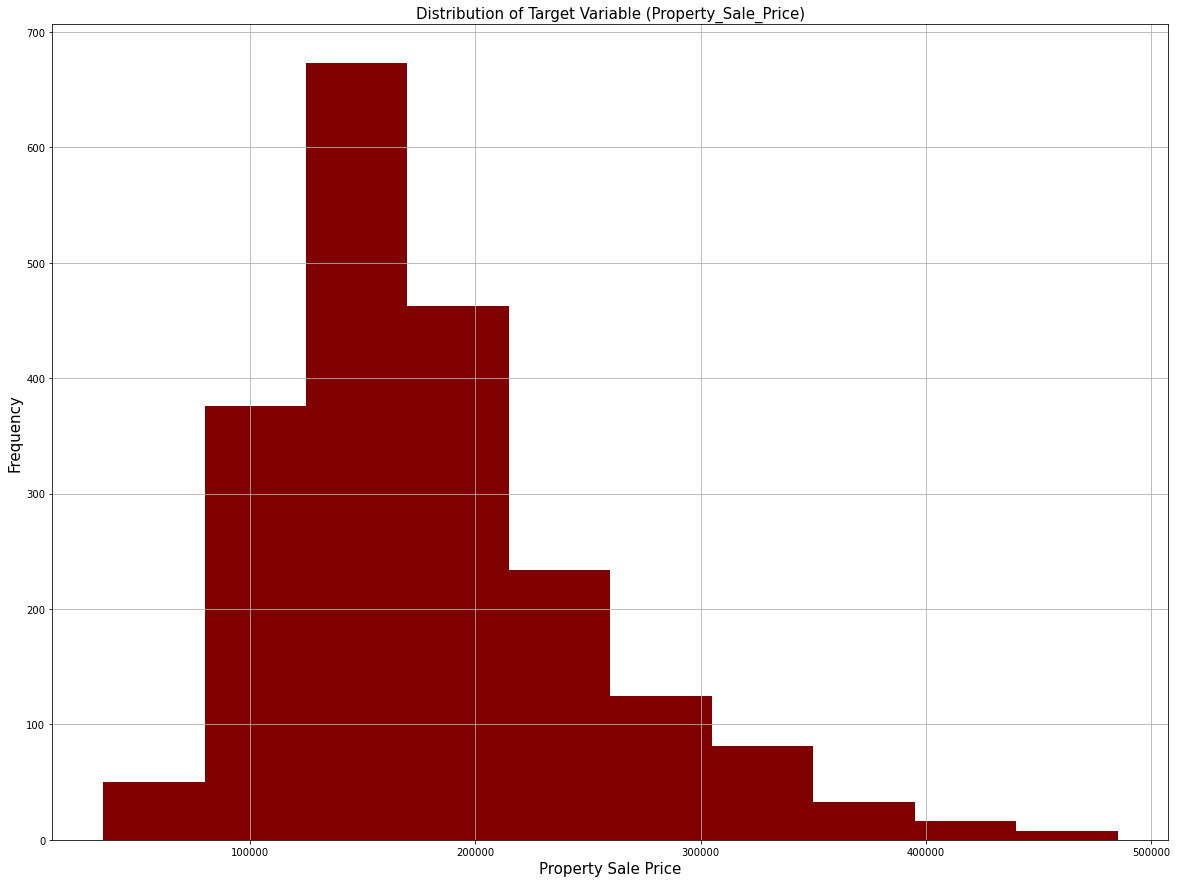

In [65]:
# check the distribution of target variable
df_property.Property_Sale_Price.hist(color = 'maroon')


plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.xlabel('Property Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


plt.show()


                   We can see that the variable 'Property_Sale_Price' is positively skewed and thus we can say that it is not normally distributed




Let us perform from Shapiro-Wilk test to check the normality of the target variable.

The null and alternate hypothesis of Shapiro-Wilk test is as follows

Ho: The data is normally distributed</strong> </p>

H1: The data is not normally distributed</strong> </p>

In [66]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df_property.Property_Sale_Price)


print('Statistics=%.3f, p-value=%.3f' % (stat, p))


alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.926, p-value=0.000
The data is not normally distributed (reject H0)



Shaprio Wilk Test does not work if the number of observations are more than 5000. 
 In case where the observations are more than 5000, other tests like  Jarque Bera test may also be used
                

**If the data is not normally distributed, use log transformation to reduce the skewness and get a near normally distributed data**

The log transformation can be used to reduce the skewbess. To log transform the 'Property_Sale_Price' variable we use the function `np.log()`.

In [67]:
# log transformation using np.log()
df_property['log_Property_Sale_Price'] = np.log(df_property['Property_Sale_Price'])

# display the top 5 rows of the data
df_property.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


**Recheck for normality by plotting histogram and performing Shapiro-Wilk test**

Let us first plot a histogram of `log_Property_Sale_Price`.

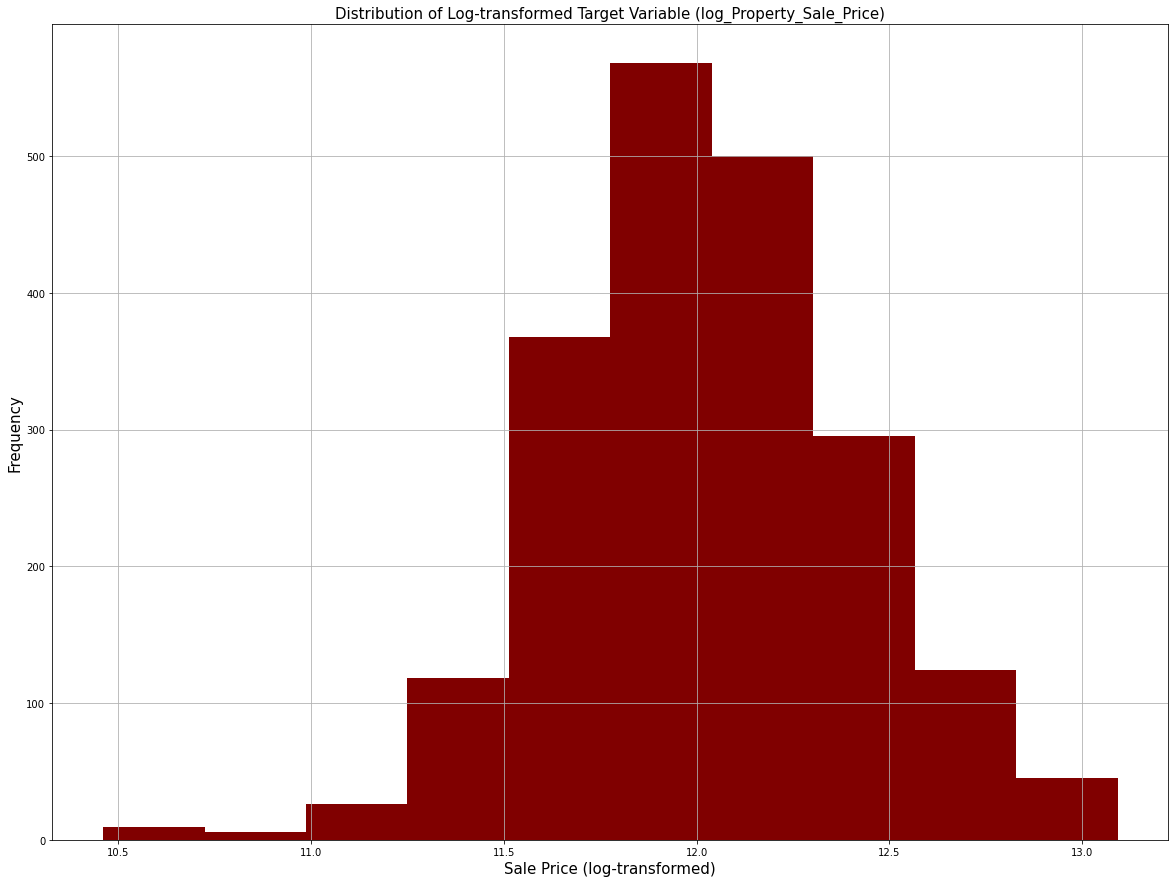

In [68]:
# recheck for normality 
# plot the histogram using hist
df_property.log_Property_Sale_Price.hist(color = 'maroon')


plt.title('Distribution of Log-transformed Target Variable (log_Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


plt.show()

Let us perform Shapiro-Wilk test.

In [69]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df_property['log_Property_Sale_Price'])


print('Statistics=%.3f, p-value=%.3f' % (stat, p))


alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.991, p-value=0.000
The data is not normally distributed (reject H0)


In [70]:
# find the skewness of the variable log_Property_Sale_Price
df_property['log_Property_Sale_Price'].skew()

-0.10293032838737998

It can be visually seen that the data has near-normal distribution, but Shapiro-Wilk test does not support the claim.
                  
Note that in reality it might be very tough for your data to adhere to all assumptions your algorithm needs.


<a id='dummy'></a>
### 4.2.2 Dummy Encode the Categorical Variables

 We need to perform dummy encoding on our categorical variables before we proceed; since the method of OLS works only on the numeric data

**Filter numerical and categorical variables**

In [71]:
# filter out the categorical variables and consider only the numeric variables using (include=np.number)
df_numeric_features = df_property.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price'],
      dtype='object')

In [72]:
# filter out the numerical variables and consider only the categorical variables using (include=object)
df_categoric_features = df_property.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [73]:
df_categoric_features.shape

(2059, 45)

**Dummy encode the catergorical variables**

In [74]:
for i in df_categoric_features.columns:
    if len(df_categoric_features.groupby([i]).size()) > 2:
         df_categoric_features = pd.get_dummies(df_categoric_features, prefix=[i], columns=[i])
df_categoric_features = pd.get_dummies(df_categoric_features, drop_first=True)

In [75]:
# to create the dummy variables  we use 'get_dummies()' from pandas 
# to create (n-1) dummy variables we use 'drop_first = True' 
#dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [76]:
df_categoric_features.shape

(2059, 296)

In [77]:
df_categoric_features.head()

,Dwell_Type_20,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Road_Type_Pave,Utilities_NoSeWa,CentralAir_Y
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,1
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1


**Concatenate numerical and dummy encoded categorical variables**

In [78]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df_property_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_property_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Road_Type_Pave,Utilities_NoSeWa,CentralAir_Y
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,1,0,0,0,0,1,0,1,0,1
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,1,0,0,0,0,1,0,1,0,1
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,1,0,0,0,0,1,0,1,0,1
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,1,1,0,0,0,0,0,1,0,1
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,1,0,0,0,0,1,0,1,0,1


In [79]:
# check the dimensions of the dataframe
df_property_dummy.shape

(2059, 330)

We will now train models by fitting a linear regression model using the method of ordinary least square(OLS).
              

<a id='LinearRegression'></a>
# 5. Linear Regression (OLS)

<a id='withLog'></a>
## 5.1 Multiple Linear Regression Full Model with Log Transformed Dependent Variable (OLS)

**1. Split the data into training and test sets**

In [82]:
# add the intercept column using 'add_constant()'
df_property_dummy = sm.add_constant(df_property_dummy)



X = df_property_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)


y = df_property_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train data and test data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# check the dimensions of the train & test subset for 

print("The shape of X_train is:",X_train.shape)


print("The shape of X_test is:",X_test.shape)


print("The shape of y_train is:",y_train.shape)


print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1544, 329)
The shape of X_test is: (515, 329)
The shape of y_train is: (1544, 2)
The shape of y_test is: (515, 2)


**2. Build model using sm.OLS().fit()**

In [84]:
# build a full model using OLS()
 
# use fit() to fit the model on train data
linreg_logmodel_full = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_logmodel_full.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.940
Model:                                 OLS   Adj. R-squared:                  0.927
Method:                      Least Squares   F-statistic:                     74.19
Date:                     Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                             16:05:10   Log-Likelihood:                 1429.1
No. Observations:                     1544   AIC:                            -2320.
Df Residuals:                         1275   BIC:                            -883.1
Df Model:                              268                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

This model explains around 94% of the variation in dependent variable log_Property_Sale_Price. 

(1)The Condition Number suggests that there is  multicollinearity in the data. 

(2)The Durbin-Watson test statistics is 1.885 i.e. close to 2.0 and thus it indicates that there is no autocorrelation.
              

**3. Predict the values using test set**

In [85]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

Note that the predicted values are log transformed Property_Sale_Price. In order to get Property_Sale_Price values, we take the antilog of thes

In [86]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_logmodel_full_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [77]:
predicted_Property_Sale_Price[:6]

1187    233086.890797
1716    192861.033108
926     313177.458795
111     168314.534097
1017    194167.362994
1107    237326.070613
dtype: float64

In [87]:
actual_Property_Sale_Price[:6]

1187    262000
1716    215000
926     285000
111     180000
1017    187500
1107    274725
Name: Property_Sale_Price, dtype: int64

**4. Compute accuracy measures**



In [88]:
 #rmse 
linreg_logmodel_full_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

 #R-squared using 
linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared

#  Adjusted R-Squared using
linreg_logmodel_full_rsquared_adj = linreg_logmodel_full.rsquared_adj 

In [106]:
print(linreg_logmodel_full_rmse)
print(linreg_logmodel_full_rsquared)
print(linreg_logmodel_full_rsquared_adj)

52537.36446295075
0.9397422488992085
0.9270763059227285


**5. Tabulate the results**

In [105]:
# create the result table for all accuracy scores

cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']



result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_logmodel_full_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_logmodel_full_rmse,
                     'R-Squared': linreg_logmodel_full_rsquared,
                     'Adj. R-Squared': linreg_logmodel_full_rsquared_adj     
                   })

result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,52537.364463,0.939742,0.927076


**We will also build a linear regression model without performing log transformation on the target variable.**


<a id='withoutLog'></a>
## 5.2 Multiple Linear Regression Full Model without Log Transformed Target Variable (OLS)

**1. Build model using sm.OLS().fit()**

In [107]:


linreg_nolog_model = sm.OLS(y_train['Property_Sale_Price'], X_train).fit()


print(linreg_nolog_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.938
Model:                             OLS   Adj. R-squared:                  0.925
Method:                  Least Squares   F-statistic:                     71.63
Date:                 Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                         17:38:59   Log-Likelihood:                -17298.
No. Observations:                 1544   AIC:                         3.513e+04
Df Residuals:                     1275   BIC:                         3.657e+04
Df Model:                          268                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

This model explains around 94% of the variation in dependent variable Property_Sale_Price. 

(1)The Durbin-Watson test statistics is 1.868 and indicates that there is no autocorrelation. 

(2)The Condition Number 1.05e+19 suggests that there is severe multicollinearity in the data.

**2. Predict the values using test set**

In [98]:
# predict the 'Property_Sale_Price' using predict()
linreg_nolog_model_predictions = linreg_nolog_model.predict(X_test)

**3. Compute accuracy measures**



In [108]:
#  rmse 
linreg_nolog_model_rmse = rmse(actual_Property_Sale_Price, linreg_nolog_model_predictions)

#  R-squared 
linreg_nolog_model_rsquared = linreg_nolog_model.rsquared

# Adjusted R-Squared 
linreg_nolog_model_rsquared_adj = linreg_nolog_model.rsquared_adj 

**4. Tabulate the results**

In [110]:
linreg_nolog_model_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_nolog_model_rmse,
                                                 'R-Squared': linreg_nolog_model_rsquared,
                                                 'Adj. R-Squared': linreg_nolog_model_rsquared_adj})


result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)


result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,52537.364463,0.939742,0.927076
1,Linreg full model without log of target variable,34266.85212,0.937719,0.924628
2,Linreg full model without log of target variable,34266.85212,0.937719,0.924628


If we compare the results we see that the linreg model withh log of target variable is  slightly better than the model without log of target variable. 


<a id='Feature_Engineering'></a>
## 5.3 Feature Engineering

<a id='feature1'></a>
### 5.3.1 Multiple Linear Regression (Using New Feature) - 1

**1. Create a new feature by using variables 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', and 'GrLivArea'.**


Create a new variable `TotalSF` representing the total square feet area of the house by adding the area of the first floor, second floor, ground level and basement of the house.

In [111]:
df_property.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,...,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


In [112]:
df_property['TotalBsmtSF'] = df_property['BsmtFinSF1'] + df_property['BsmtFinSF2'] + df_property['BsmtUnfSF']

df_property['TotalSF'] = df_property['TotalBsmtSF'] + df_property['1stFlrSF'] + df_property['2ndFlrSF'] + df_property['GrLivArea']


df_property = df_property.drop(["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea"], axis=1)

In [113]:

df_property = df_property.drop(["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF"], axis=1)

In [114]:
df_property.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Fence

In [116]:
#consider only the numerical variables 
df_numeric_features = df_property.select_dtypes(include=np.number)

#consider only the categorical variables 
df_categoric_features = df_property.select_dtypes(include = object)

**Dummy encode the catergorical variables**

In [117]:
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [118]:

df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)


df_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,0,1,0,2,1,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,0,0,1,2,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,0,1,0,2,1,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,0,1,0,2,1,...,0,0,0,0,1,0,0,0,1,0


**2. Split the data into train and test sets**

In [119]:

df_dummy = sm.add_constant(df_dummy)


X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)


y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


print("The shape of X_train is:",X_train.shape)

print("The shape of X_test is:",X_test.shape)


print("The shape of y_train is:",y_train.shape)


print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 281)
The shape of X_test is: (618, 281)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


**3. Build model using sm.OLS().fit()**

In [120]:

linreg_feature_1_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()


print(linreg_feature_1_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.84
Date:                     Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                             17:46:01   Log-Likelihood:                 1373.6
No. Observations:                     1441   AIC:                            -2221.
Df Residuals:                         1178   BIC:                            -834.3
Df Model:                              262                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

There is  multicollinearity in the data. 
(1)The Durbin-Watson test statistics is 1.885 i.e. close to 2.0 and thus it indicates that there is no autocorrelation.
               

**4. Predict the values using test set**

In [95]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_feature_1_model_predictions = linreg_feature_1_model.predict(X_test)

In [96]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_feature_1_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

**5. Compute accuracy measures**



In [121]:
#rmse 
linreg_feature_1_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

#  R-squared 
linreg_feature_1_model_rsquared = linreg_feature_1_model.rsquared

#  Adjusted R-Squared using rsquared_adj
linreg_feature_1_model_rsquared_adj = linreg_feature_1_model.rsquared_adj 

**6. Tabulate the results**

In [122]:

linreg_feature_1_model_metrics = pd.Series({'Model': "Linreg with new feature (TotalSF) ",
                                                'RMSE': linreg_feature_1_model_rmse,
                                                'R-Squared': linreg_feature_1_model_rsquared,
                                                'Adj. R-Squared': linreg_feature_1_model_rsquared_adj})


result_tabulation = result_tabulation.append(linreg_feature_1_model_metrics, ignore_index = True)


result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,52537.364463,0.939742,0.927076
1,Linreg full model without log of target variable,34266.85212,0.937719,0.924628
2,Linreg full model without log of target variable,34266.85212,0.937719,0.924628
3,Linreg with new feature (TotalSF),52537.364463,0.941861,0.92893


<a id='feature2'></a>
### 5.3.2 Multiple Linear Regression (Using New Feature) - 2

**1. Create two new feature by using variables 'Buiding_age' and 'Remodel_age'**

In [123]:
# 'datetime' is used to perform operations related to date and time
import datetime as dt

# 'now().year' returns the current year
current_year = int(dt.datetime.now().year)

In [124]:
# create 2 new variables 'Buiding_age' and 'Remoel_age' 
Buiding_age = current_year - df_property.YearBuilt
Remodel_age = current_year - df_property.YearRemodAdd

In [125]:
# append the newly created variables to the dataframe
df_property['Buiding_age'] = Buiding_age
df_property['Remodel_age'] = Remodel_age

# as we have added a new variable using the variables 'YearBuilt' and 'YearRemodAdd', we will drop them
# drop the variables using drop()
df_property = df_property.drop(['YearBuilt', 'YearRemodAdd'], axis=1)

In [126]:

df_numeric_features = df_property.select_dtypes(include=np.number)


df_categoric_features = df_property.select_dtypes(include = object)

**Dummy encode the catergorical variables**

In [127]:
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

**Concatenate numerical and dummy encoded categorical variables**

In [129]:

df_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)


df_dummy.head()

,LotFrontage,LotArea,MasVnrArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,0,1,0,2,1,3,1,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,0,0,1,2,0,3,1,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,0,1,0,2,1,3,1,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,0,1,0,1,0,3,1,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,0,1,0,2,1,4,1,...,0,0,0,0,1,0,0,0,1,0


**2. Split the data into train and test sets**

In [130]:

df_dummy = sm.add_constant(df_dummy)


X = df_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)


y = df_dummy[['Property_Sale_Price','log_Property_Sale_Price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


print("The shape of X_train is:",X_train.shape)


print("The shape of X_test is:",X_test.shape)


print("The shape of y_train is:",y_train.shape)


print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 281)
The shape of X_test is: (618, 281)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


**3. Build model using sm.OLS().fit()**

In [131]:

linreg_feature_2_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()


print(linreg_feature_2_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.84
Date:                     Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                             21:10:09   Log-Likelihood:                 1373.6
No. Observations:                     1441   AIC:                            -2221.
Df Residuals:                         1178   BIC:                            -834.3
Df Model:                              262                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

**4. Predict the values using test set**

In [133]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_feature_2_model_predictions = linreg_feature_2_model.predict(X_test)

In [134]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_feature_2_model_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [135]:

linreg_feature_2_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)


linreg_feature_2_model_rsquared = linreg_feature_2_model.rsquared


linreg_feature_2_model_rsquared_adj = linreg_feature_2_model.rsquared_adj 

**6. Tabulate the results**

In [136]:

linreg_feature_2_model_metrics = pd.Series({'Model': "Linreg with new features (Building_age and Remodel_age)",
                                                'RMSE': linreg_feature_2_model_rmse,
                                                'R-Squared': linreg_feature_2_model_rsquared,
                                                'Adj. R-Squared': linreg_feature_2_model_rsquared_adj})


result_tabulation = result_tabulation.append(linreg_feature_2_model_metrics, ignore_index = True)


result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,52537.364463,0.939742,0.927076
1,Linreg full model without log of target variable,34266.85212,0.937719,0.924628
2,Linreg full model without log of target variable,34266.85212,0.937719,0.924628
3,Linreg with new feature (TotalSF),52537.364463,0.941861,0.92893
4,Linreg with new features (Building_age and Rem...,26350.33087,0.941861,0.92893


<a id='feature_selection'></a>
# 6. Feature Selection

<a id='vif'></a>
## 6.1 Variance Inflation Factor



In [137]:
# consider the independent variables in the dataframe 'df_property' 

df_property_features = df_property.drop(['Property_Sale_Price', 'log_Property_Sale_Price'], axis = 1)

# filter out the categorical variables 
df_numeric_features_vif = df_property_features.select_dtypes(include=[np.number])


df_numeric_features_vif.head()

,LotFrontage,LotArea,MasVnrArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,TotalSF,Buiding_age,Remodel_age
0,65.0,8450,196.0,0,1,0,2,1,3,1,...,61,0,0,0,0,2,2008,4276,19,19
1,80.0,9600,0.0,0,0,1,2,0,3,1,...,0,0,0,0,0,5,2007,3786,46,46
2,68.0,11250,162.0,0,1,0,2,1,3,1,...,42,0,0,0,0,9,2008,4492,21,20
3,60.0,9550,0.0,0,1,0,1,0,3,1,...,35,272,0,0,0,2,2006,4190,107,52
4,84.0,14260,350.0,0,1,0,2,1,4,1,...,84,0,0,0,0,12,2008,5541,22,22


#### Calculate the VIF for each numeric variable.

In [138]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()


# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]


vif["Features"] = df_numeric_features_vif.columns


vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,77.209641,YrSold
1,74.113390,TotRmsAbvGrd
2,51.770576,TotalSF
3,38.389199,GarageCars
4,33.065557,GarageYrBlt
5,31.035282,GarageArea
6,29.530388,BedroomAbvGr
7,27.909402,KitchenAbvGr
8,21.451474,FullBath
9,10.569753,LotFrontage


 We can see that the variable 'YrSold' has the highest VIF. 
 We will remove the variables having VIF greater than 10. 

In [139]:
# we will calculate the VIF for each numerical variable
for ind in range(len(df_numeric_features_vif.columns)):
    
   
    vif = pd.DataFrame()

   
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

  
    vif["Features"] = df_numeric_features_vif.columns

  
    vif_more_than_10 = vif[vif['VIF_Factor'] > 10]
    
   
    if(vif_more_than_10.empty == False):
        df_sorted = vif_more_than_10.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
   
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor       Features
0     9.094498    LotFrontage
1     2.653390        LotArea
2     1.631833     MasVnrArea
3     1.053572   LowQualFinSF
4     1.828080   BsmtFullBath
5     1.091342   BsmtHalfBath
6     9.636426       FullBath
7     1.726119       HalfBath
8     2.423997     Fireplaces
9     8.327266     GarageArea
10    1.755363     WoodDeckSF
11    1.739094    OpenPorchSF
12    1.289750  EnclosedPorch
13    1.025000      3SsnPorch
14    1.160607    ScreenPorch
15    1.014074        MiscVal
16    5.873779         MoSold
17    6.146684    Buiding_age
18    5.361359    Remodel_age


 The above dataframe contains all the variables with VIF less than 10. 


**1. Concatenate numerical and dummy encoded categorical variables**

In [140]:

df_dummy = pd.concat([df_numeric_features_vif, dummy_encoded_variables], axis=1)

df_dummy.head()

,LotFrontage,LotArea,MasVnrArea,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,Fireplaces,GarageArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,0,1,0,2,1,0,548,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,0,0,1,2,0,1,460,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,0,1,0,2,1,1,608,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,0,1,0,1,0,1,642,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,0,1,0,2,1,1,836,...,0,0,0,0,1,0,0,0,1,0


**2. Split the data into train and test sets**

In [141]:

df_dummy = sm.add_constant(df_dummy)


X = df_dummy.copy()

y = df_property[['Property_Sale_Price','log_Property_Sale_Price']]

  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)


print("The shape of X_train is:",X_train.shape)


print("The shape of X_test is:",X_test.shape)


print("The shape of y_train is:",y_train.shape)


print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 274)
The shape of X_test is: (618, 274)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


**3. Build model using sm.OLS().fit()**

In [142]:
# build a full model using OLS()

linreg_vif_model = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()


print(linreg_vif_model.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.921
Model:                                 OLS   Adj. R-squared:                  0.904
Method:                      Least Squares   F-statistic:                     54.01
Date:                     Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                             21:30:33   Log-Likelihood:                 1150.7
No. Observations:                     1441   AIC:                            -1789.
Df Residuals:                         1185   BIC:                            -439.4
Df Model:                              255                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

**4. Predict the values using test set**

In [143]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_vif_model_predictions = linreg_vif_model.predict(X_test)

 we take the antilog of these predicted values by using the function np.exp()</b>
                

In [144]:

predicted_Property_Sale_Price = np.exp(linreg_vif_model_predictions)


actual_Property_Sale_Price = y_test['Property_Sale_Price']

**5. Compute accuracy measures**



In [145]:

linreg_vif_model_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)


linreg_vif_model_rsquared = linreg_vif_model.rsquared


linreg_vif_model_rsquared_adj = linreg_vif_model.rsquared_adj 

**6. Tabulate the results**

In [146]:

linreg_vif_model_metrics = pd.Series({'Model': "Linreg with VIF",
                                                'RMSE': linreg_vif_model_rmse,
                                                'R-Squared': linreg_vif_model_rsquared,
                                                'Adj. R-Squared': linreg_vif_model_rsquared_adj})


result_tabulation = result_tabulation.append(linreg_vif_model_metrics, ignore_index = True)


result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,52537.364463,0.939742,0.927076
1,Linreg full model without log of target variable,34266.85212,0.937719,0.924628
2,Linreg full model without log of target variable,34266.85212,0.937719,0.924628
3,Linreg with new feature (TotalSF),52537.364463,0.941861,0.92893
4,Linreg with new features (Building_age and Rem...,26350.33087,0.941861,0.92893
5,Linreg with VIF,27402.540487,0.920781,0.903734


 From the above table we can see that the linear regression with new features has the lowest RMSE value. 
 Thus it can be concluded that the linear regression model with new features can be used to predict the price of the house.
                   

In [147]:
df_property.Property_Sale_Price.mean()

178131.78436134045